In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
sns.set(font_scale=2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Get data (already processed in other nb)

In [2]:
#create list of dir paths
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb'
    
path_file_names = os.listdir(path)

data_paths = []

for file in path_file_names:
    int_path = path + '/' + file
    data_paths.append(int_path)
    
data_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_221010.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220708.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/flavor_211220.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/etoh_220105.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220718.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220929.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220518.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/fent_220406.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220727.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/etoh_2

In [3]:
data_final = pd.DataFrame()

for path in data_paths:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
    
    data_int = pd.read_csv(path)
    data_int = pd.DataFrame(data = data_int)

    if data_final.shape[0] == 0:
        data_final = data_int
    else:
        data_final = pd.concat([data_final, data_int], axis=0)
        
    print(data_final.shape)
    
data_final.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_221010.csv
(26291, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220708.csv
(40758, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/flavor_211220.csv
(49832, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/etoh_220105.csv
(94149, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220718.csv
(126046, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220929.csv
(175449, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220518.csv
(188478, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/fent_220406.csv
(191557, 49)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/data/final_data/comb/poly_220727.csv
(197344, 49)
/Users/abbie

,Unnamed: 0,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance
0,0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611,EtOH05
1,1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614,EtOH05
2,2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617,EtOH05
3,3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619,EtOH05
4,4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1.0,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858,EtOH05


In [4]:
data_final = data_final[data_final['Round']=='poly']

In [5]:
len(data_final['IdRFID'].unique())

95

In [6]:
data_final['value_wt'] = data_final['value']*1000 / data_final['weight_pre']

### Check for incomplete data and dripping

#### Lost RFID

In [7]:
RFID_count = data_final[data_final['VDM_RFID_timediff']<3].groupby(['IdRFID', 'day_count'])['RFID_eventDuration'].sum().reset_index(name='count')

RFID_count.head()

,IdRFID,day_count,count
0,041ABFE4E6,1,1492.492
1,041ABFE4E6,2,8030.039
2,041ABFE4E6,3,10753.307
3,041ABFE4E6,4,11207.840
4,041ABFE4E6,5,6547.557


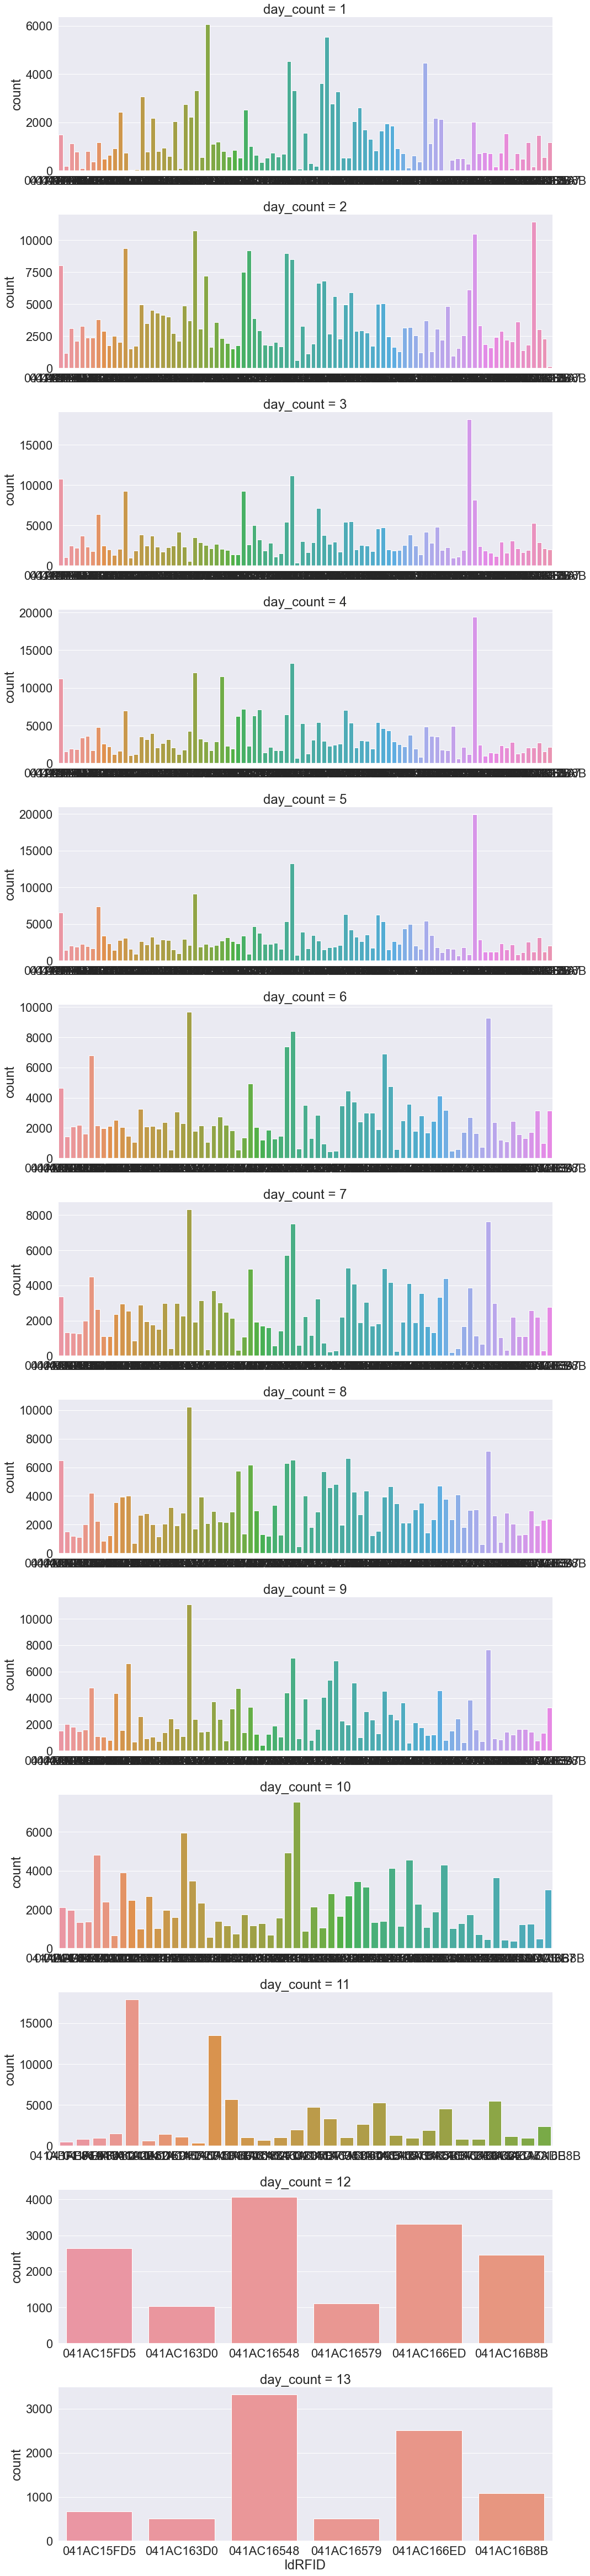

In [8]:
sns.catplot(x='IdRFID', y='count', data=RFID_count, col='day_count', col_wrap=1, kind='bar', height=5, aspect=3, sharey=False, sharex=False)

In [9]:
data_final['IdRFID'].value_counts()

041ABFF71D    29213
041AC15EFE    22483
041AC1684E    18145
041AC15F5E    14293
041AC16384    12406
041AC16888    11243
041AC16B8B    7101 
041AC16B28    7072 
041AC1610D    6832 
041AC02E82    6317 
041AC01110    5834 
041AC16728    5783 
041AC167B8    5468 
041AC160EC    4001 
041AC1610F    3974 
041AC163A9    3610 
041AC15F9B    2980 
041AC1635B    2855 
041AC02F19    2457 
041AC1637F    2238 
041AC15E27    2166 
041AC164CB    1934 
041AC166ED    1915 
041AC165B6    1792 
041AC16845    1661 
041AC1646F    1658 
041AC162E6    1647 
041AC16672    1606 
041ABFE4E6    1578 
041AC15FD5    1574 
041AC1617F    1506 
041AC1646E    1423 
041AC15F30    1412 
041AC16486    1406 
041AC16548    1391 
041AC1649B    1368 
041AC16579    1334 
041AC165C6    1322 
041AC1620E    1296 
041AC15F27    1293 
041AC16188    1291 
041AC16A00    1248 
041AC16321    1245 
041AC166B1    1239 
041AC163D0    1207 
041AC16A73    1195 
041AC03290    1161 
041ABFFA62    1151 
041AC15DF7    1139 
041AC160F9    1130 


#### Lost RFID or clicking

In [10]:
data_final['VDM_file'].value_counts()

f20_w_e10_f5_w_e5_mf_220504.csv    84103
w_e10_f20_w_e5_f5_mf_220929.csv    35072
w_e10_f20_w_e5_f5_m_2207018.csv    31897
w_e10_f20_w_e5_f5_mf_221010.csv    26291
f20_w_e10_f5_w_e5_mf_220420.csv    23337
f20_w_e10_f5_w_e5_m_220601.csv     14522
w_e10_f20_w_e5_f5_mf_220708.csv    14467
f20_w_e10_f5_w_e5_mf_220518.csv    13029
w_e10_f20_w_e5_f5_f_220727.csv     5787 
w_e10_f20_w_e5_f5_mf_220919.csv    5235 
Name: VDM_file, dtype: int64

In [11]:
for file in data_final['VDM_file'].unique():
    print(file)
    d=data_final[data_final['VDM_file']==file]
    print(d.groupby(['Cage', 'VDM_drink', ])['VDM_RFID_timediff_bool'].value_counts())
    

w_e10_f20_w_e5_f5_mf_221010.csv
Cage  VDM_drink   VDM_RFID_timediff_bool
1     VDM_EtOH05  same                      159 
                  diff                      26  
      VDM_EtOH10  same                      64  
                  diff                      31  
      VDM_Fent05  same                      3527
                  diff                      258 
      VDM_Fent20  same                      38  
                  diff                      28  
      VDM_water   same                      235 
                  diff                      93  
2     VDM_EtOH05  same                      41  
                  diff                      24  
      VDM_EtOH10  diff                      28  
                  same                      8   
      VDM_Fent05  same                      4227
                  diff                      176 
      VDM_Fent20  diff                      33  
                  same                      17  
      VDM_water   same                      8

Cage  VDM_drink   VDM_RFID_timediff_bool
1     VDM_EtOH05  diff                      45   
                  same                      26   
      VDM_EtOH10  diff                      31   
      VDM_Fent05  diff                      26   
                  same                      4    
      VDM_Fent20  diff                      68   
                  same                      5    
      VDM_water   diff                      1232 
                  same                      1059 
2     VDM_EtOH05  diff                      40   
                  same                      1    
      VDM_EtOH10  diff                      43   
      VDM_Fent05  diff                      102  
                  same                      1    
      VDM_Fent20  diff                      51   
                  same                      3    
      VDM_water   diff                      1482 
                  same                      1456 
3     VDM_EtOH05  diff                      12   
      VDM

In [12]:
data_final = data_final[~((data_final['VDM_file']=='f20_w_e10_f5_w_e5_mf_220420.csv') & 
                          (data_final['Cage']==4))
                       ] 

#only record first 5 days
data_final = data_final[~((data_final['VDM_file']=='f20_w_e10_f5_w_e5_mf_220504.csv'))
                       ] 

data_final = data_final[~((data_final['VDM_file']=='f20_w_e10_f5_w_e5_m_220601.csv') & 
                          (data_final['Cage']==4))
                       ] 

data_final = data_final[~((data_final['VDM_file']=='w_e10_f20_w_e5_f5_m_2207018.csv') & 
                          (data_final['Cage']==1))
                       ] 

data_final = data_final[~((data_final['VDM_file']=='w_e10_f20_w_e5_f5_mf_220929.csv') & 
                          (data_final['Cage']==2))
                       ] 

data_final = data_final[~((data_final['VDM_file']=='w_e10_f20_w_e5_f5_mf_221010.csv') & 
                          (data_final['Cage']==4))
                       ] 


#### Exclude nan for IdRFID

In [13]:
print(data_final.shape)
    
data_final_clean = data_final[~data_final['IdRFID'].isna()]
print(data_final_clean.shape)
    
data_final_clean.head()

(90299, 50)
(90299, 50)


,Unnamed: 0,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,value_wt
0,0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611,EtOH05,0.707071
1,1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614,EtOH05,0.707071
2,2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617,EtOH05,0.707071
3,3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619,EtOH05,0.707071
4,4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1.0,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858,EtOH05,0.707071


In [14]:
data_final_clean.groupby('VDM_file')['day_count'].max()

VDM_file
f20_w_e10_f5_w_e5_m_220601.csv     13
f20_w_e10_f5_w_e5_mf_220420.csv    9 
f20_w_e10_f5_w_e5_mf_220518.csv    9 
w_e10_f20_w_e5_f5_f_220727.csv     10
w_e10_f20_w_e5_f5_m_2207018.csv    10
w_e10_f20_w_e5_f5_mf_220708.csv    11
w_e10_f20_w_e5_f5_mf_220919.csv    11
w_e10_f20_w_e5_f5_mf_220929.csv    11
w_e10_f20_w_e5_f5_mf_221010.csv    10
Name: day_count, dtype: int64

In [15]:
data_final_clean = data_final_clean[data_final_clean['day_count']<10]

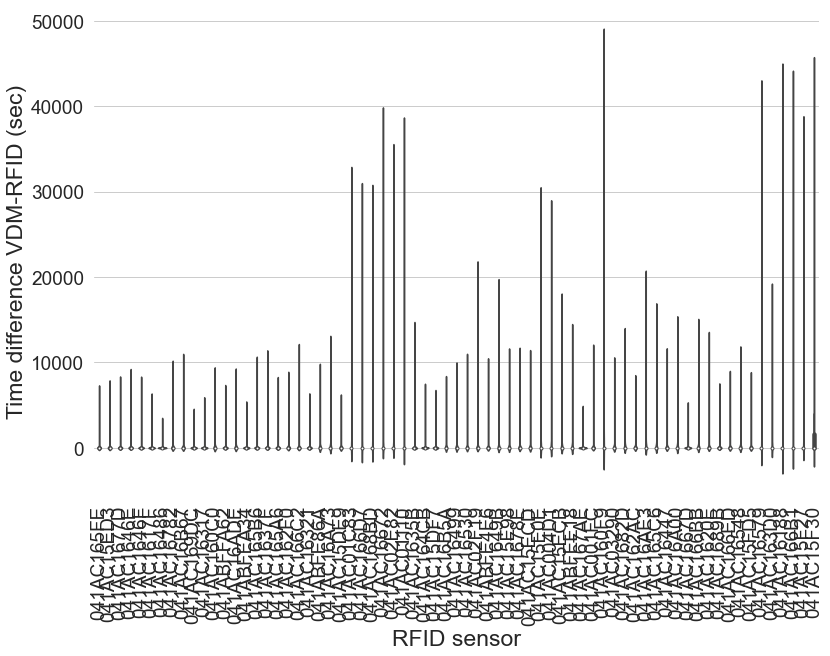

In [16]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(13,9))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.violinplot(x='IdRFID', y='VDM_RFID_timediff', data=data_final_clean,  estimator='mean',
            ci=68)

plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)

plt.xlabel('RFID sensor', fontsize=23)
plt.ylabel('Time difference VDM-RFID (sec)', fontsize=23)

plt.show()

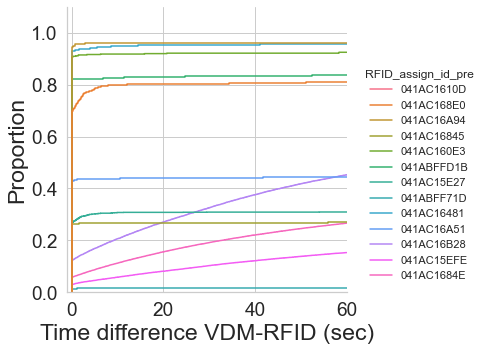

In [17]:
sns.displot(data=d, x="VDM_RFID_timediff", kind="ecdf", hue='RFID_assign_id_pre')
plt.xlabel('Time difference VDM-RFID (sec)')
plt.xlim(-1,60 )
plt.ylim(0,1.1)
plt.xlabel('Time difference VDM-RFID (sec)', fontsize=23)
plt.ylabel('Proportion', fontsize=23)
plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 
plt.show()

### Compare across cages - is there a sipper preference

In [19]:
data_final_clean_3s = data_final_clean[data_final_clean['VDM_RFID_timediff']<3]

data_final_clean_3s.to_csv('data_final_clean_3s_221019.csv')

In [20]:
data_final_clean_3s_gb = data_final_clean_3s.groupby(['Round', 'VDM_file', 'variable', 'Sex', 'Cage', 'Cage_N', 'IdRFID', 'day_count', 
                                   'substance', ])[['value', 'value_wt', 'VDM_RFID_timediff']].sum().reset_index()

data_final_clean_3s_gb.head()

,Round,VDM_file,variable,Sex,Cage,Cage_N,IdRFID,day_count,substance,value,value_wt,VDM_RFID_timediff
0,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,1,Fent20,0.042,1.31250,0.0
1,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,2,Fent20,0.021,0.65625,0.0
2,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,3,Fent20,0.042,1.31250,0.0
3,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,5,Fent20,0.105,3.28125,0.0
4,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,5,water,0.021,0.65625,0.0


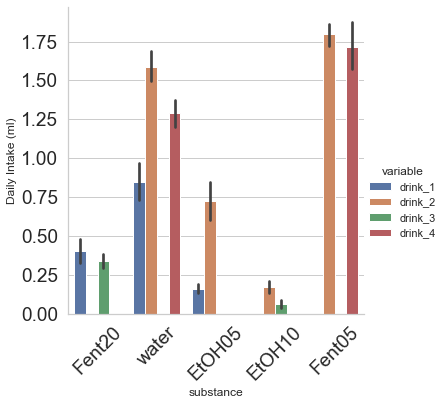

In [21]:
d=data_final_clean_3s_gb[data_final_clean_3s_gb['Round']=='poly']

sns.catplot(x='substance', y='value', data=d,  kind='bar', 
            ci=68, height=5, aspect=1, hue='variable', )

plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

### Summary graphs

In [27]:
data_final_clean_3s_gb = data_final_clean_3s.groupby(['Round', 'VDM_file', 'variable', 'Sex', 'Cage', 'Cage_N', 'IdRFID', 'day_count',  
                                   'substance', ])[['value', 'value_wt', 'VDM_RFID_timediff']].sum().reset_index()

data_final_clean_3s_gb['Daily intake (g/kg)'] = data_final_clean_3s_gb['value_wt']
data_final_clean_3s_gb['Daily intake (ml)'] = data_final_clean_3s_gb['value']
d = data_final_clean_3s_gb[data_final_clean_3s_gb['Round']=='poly']
d['Housing'] = ['single' if x==1 else 'multiple' for x in d['Cage_N']]
d.head()

,Round,VDM_file,variable,Sex,Cage,Cage_N,IdRFID,day_count,substance,value,value_wt,VDM_RFID_timediff,Daily intake (g/kg),Daily intake (ml),Housing
0,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,1,Fent20,0.042,1.31250,0.0,1.31250,0.042,multiple
1,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,2,Fent20,0.021,0.65625,0.0,0.65625,0.021,multiple
2,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,3,Fent20,0.042,1.31250,0.0,1.31250,0.042,multiple
3,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,5,Fent20,0.105,3.28125,0.0,3.28125,0.105,multiple
4,poly,f20_w_e10_f5_w_e5_m_220601.csv,drink_1,male,1,3,041AC15FD5,5,water,0.021,0.65625,0.0,0.65625,0.021,multiple


<Figure size 936x648 with 0 Axes>

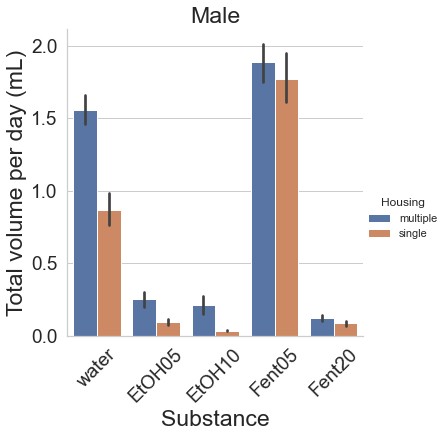

In [55]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

order = ['water', 'EtOH05', 'EtOH10', 'Fent05', 'Fent20']
sns.catplot(x='substance', y='Daily intake (ml)', data=d[d['Sex']=='male'],  kind='bar', 
            ci=68, hue='Housing', order=order)

plt.xlabel('Substance', fontsize=23)
plt.ylabel('Total volume per day (mL)', fontsize=23)
plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

Fent20


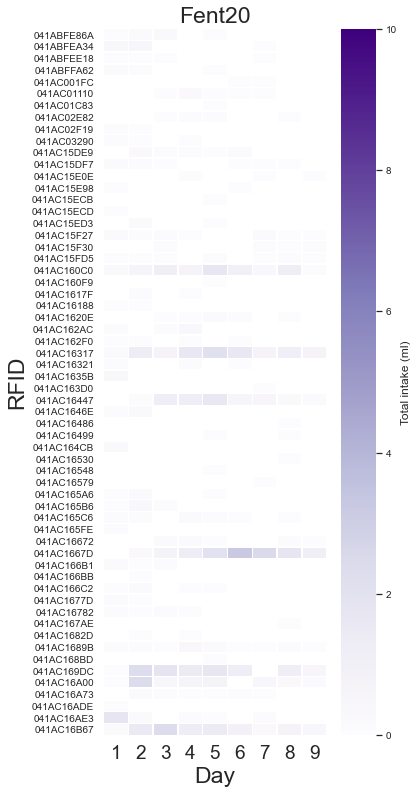

water


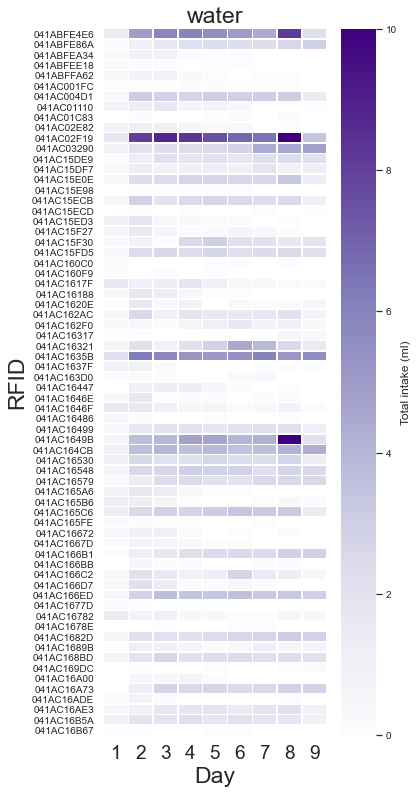

EtOH05


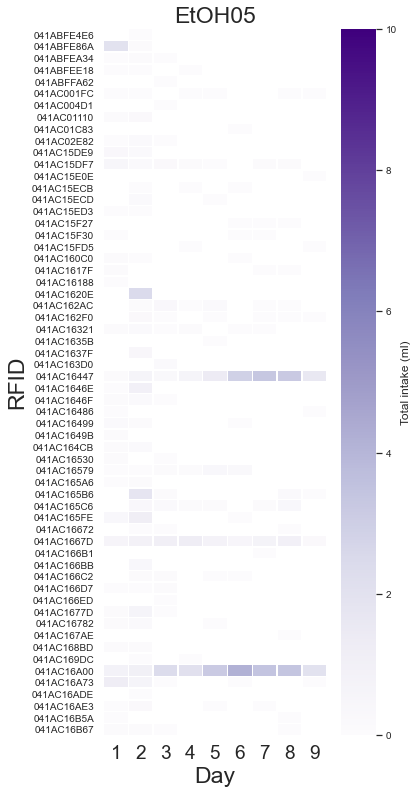

EtOH10


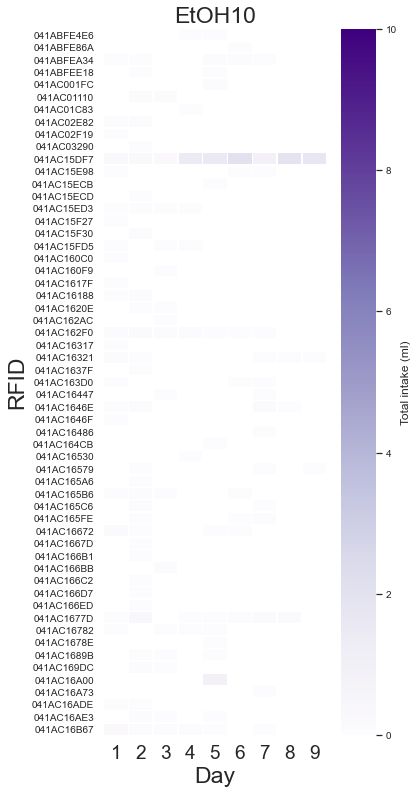

Fent05


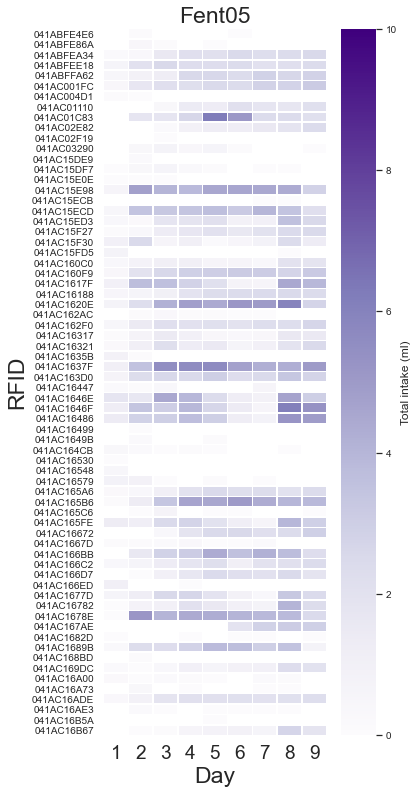

In [62]:
for sub in d['substance'].unique():
    print(sub)
    d2 = d[d['substance']==sub].sort_values('Cage_N')
    groupby = d2[d2['day_count']<11].groupby(['IdRFID', 'day_count'])['Daily intake (ml)'].sum().reset_index()
    groupby = groupby.pivot('IdRFID', 'day_count', "Daily intake (ml)")
    
    sns.set_theme(style="whitegrid")

    plt.rc('xtick', labelsize=19) 
    plt.rc('ytick', labelsize=10) 
    
    plt.figure(figsize=(5,13))
    
    sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=10, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})
    
    plt.xlabel('Day', fontsize=23)
    plt.ylabel('RFID', fontsize=23)
    plt.title(sub, fontsize=23)
    #plt.xticks(rotation=45)
    plt.show()

041AC15FD5


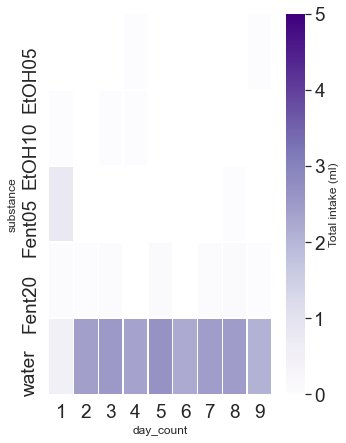

041AC16548


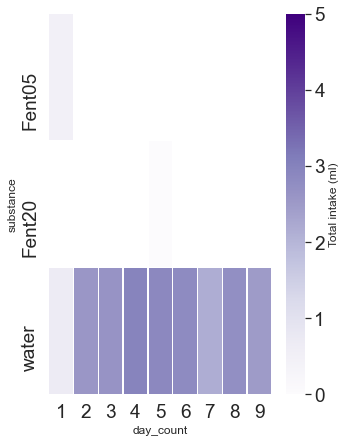

041AC16579


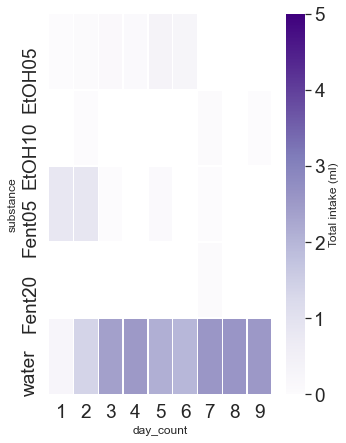

041AC163D0


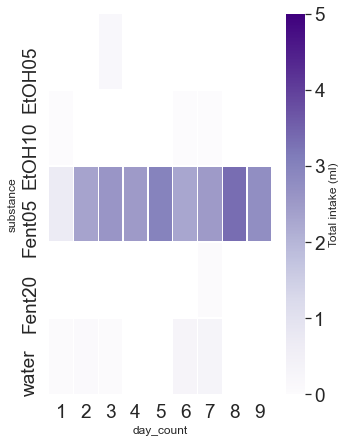

041AC166ED


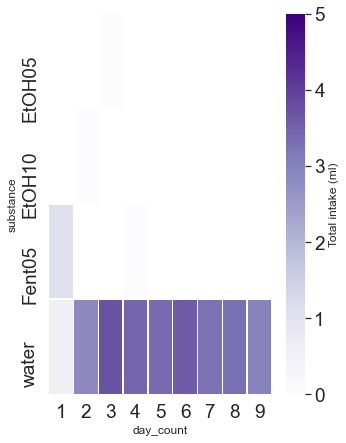

041AC16447


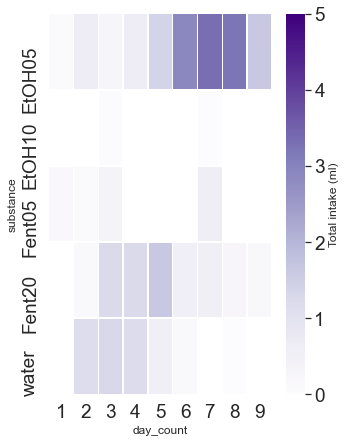

041AC1667D


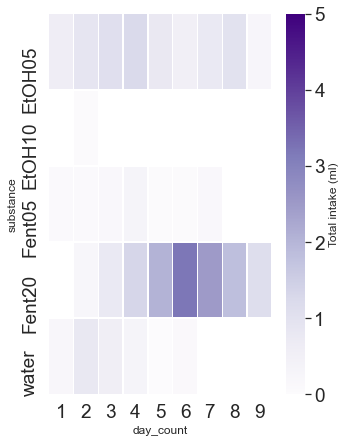

041AC16A00


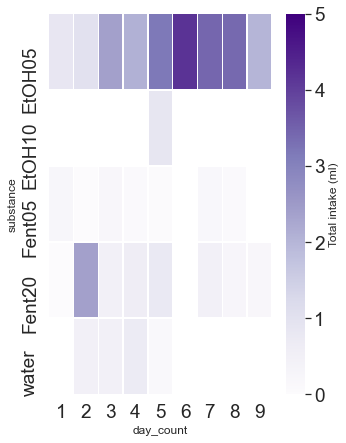

041AC162AC


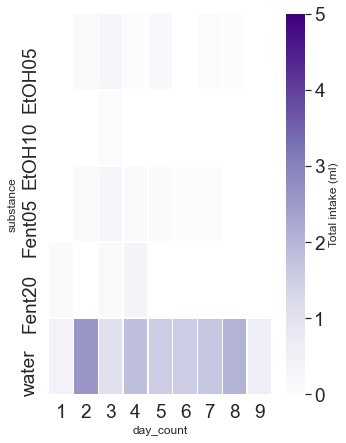

041AC165C6


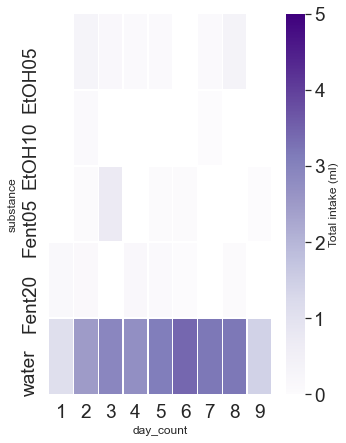

041AC16AE3


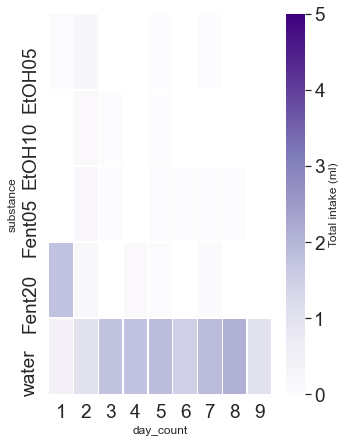

041AC1620E


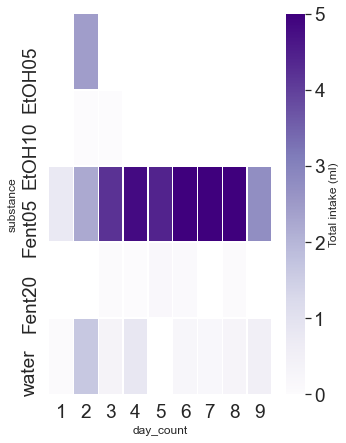

041AC166BB


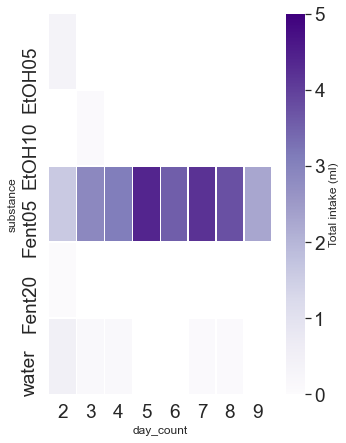

041AC1689B


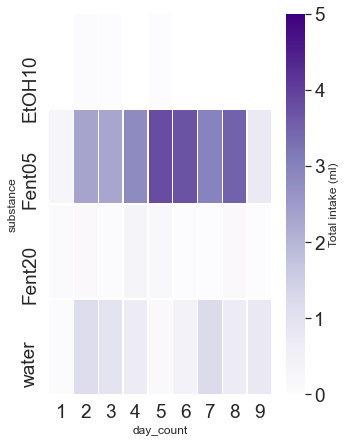

041AC16499


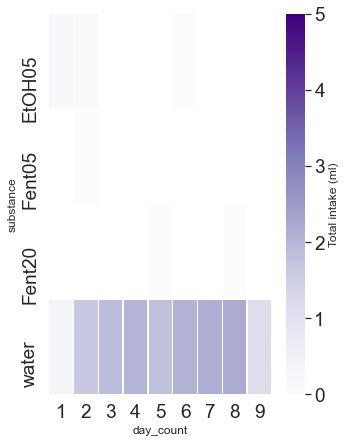

041AC16530


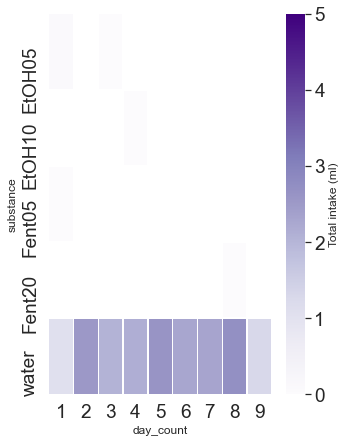

041AC15E98


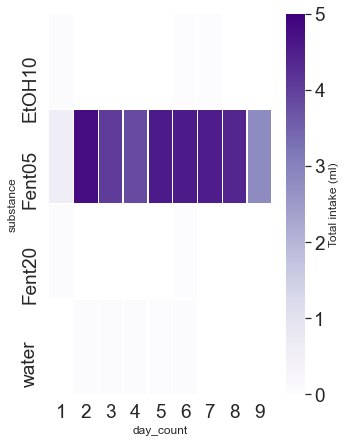

041AC15ECD


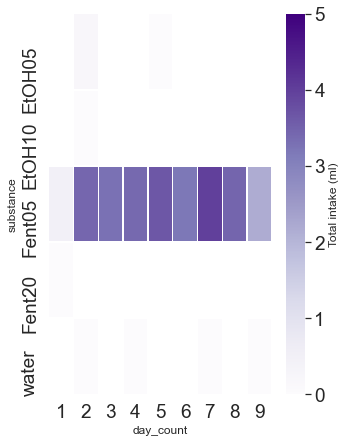

041AC1678E


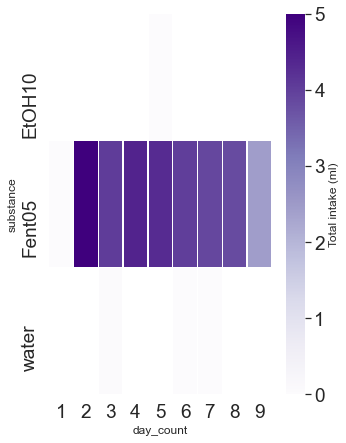

041ABFE4E6


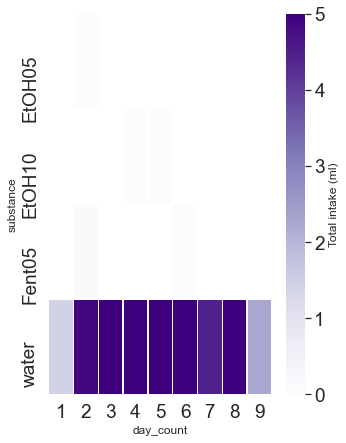

041AC02F19


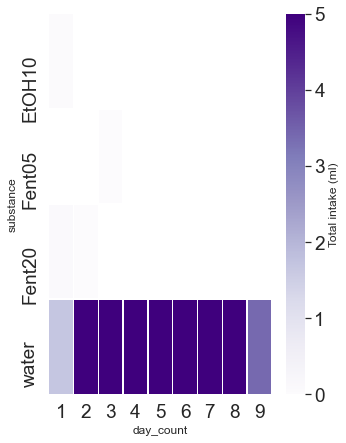

041AC1649B


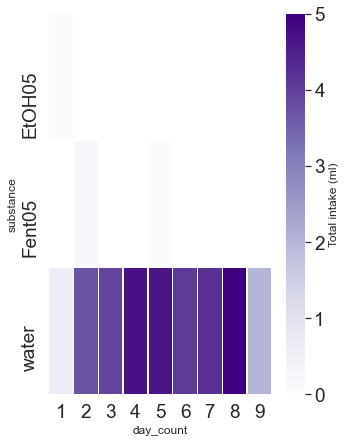

041AC15E0E


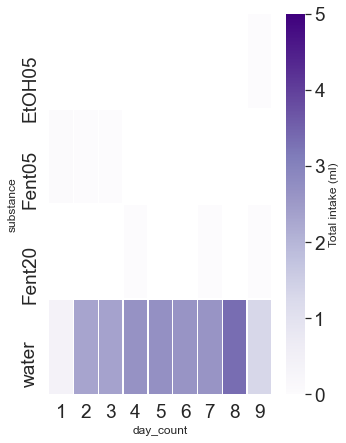

041AC15ECB


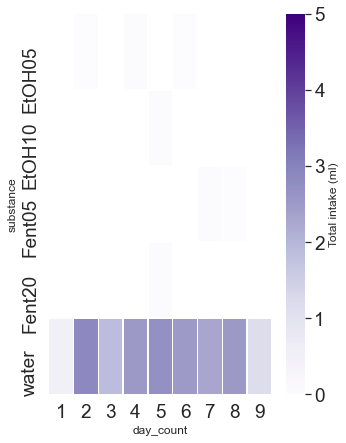

041AC16B5A


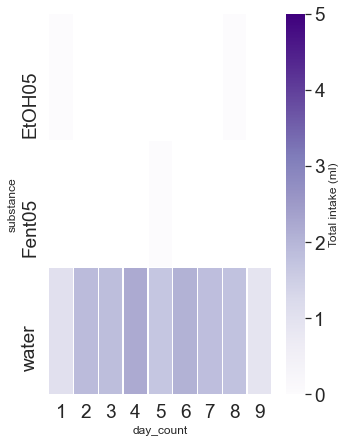

041AC004D1


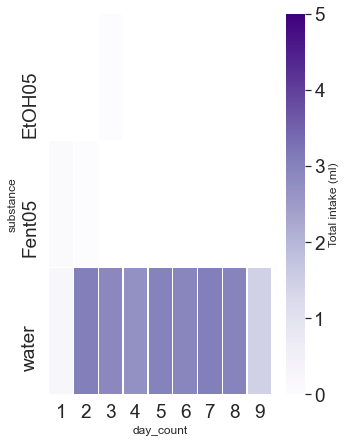

041ABFEE18


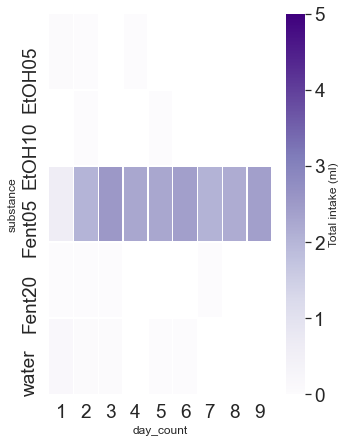

041AC001FC


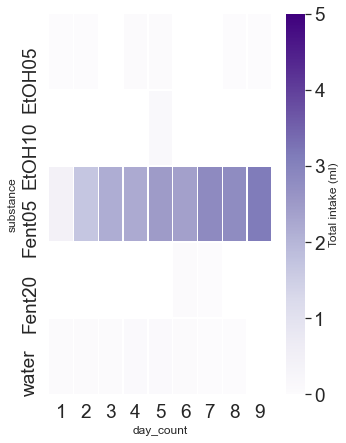

041AC167AE


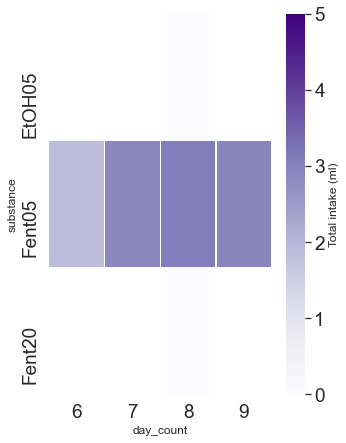

041AC160F9


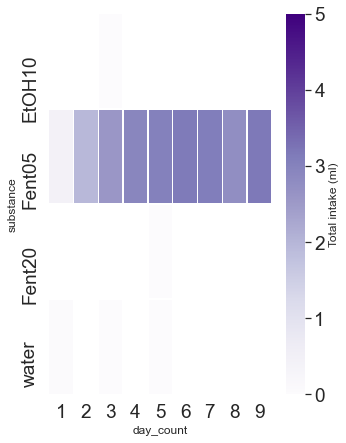

041AC1682D


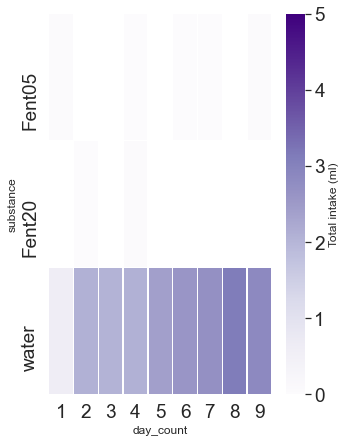

041AC03290


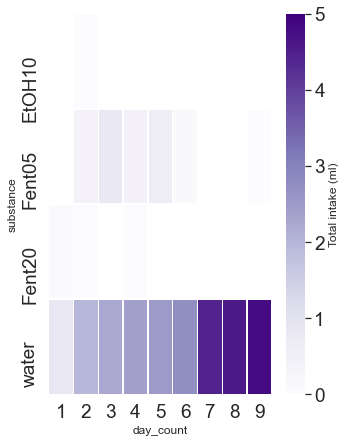

041AC01C83


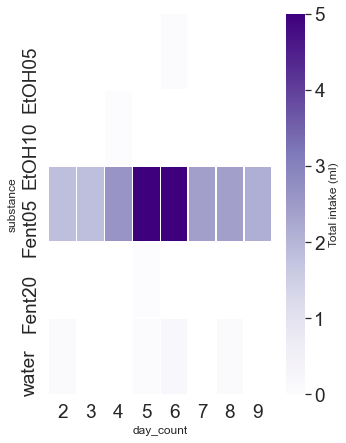

041AC166D7


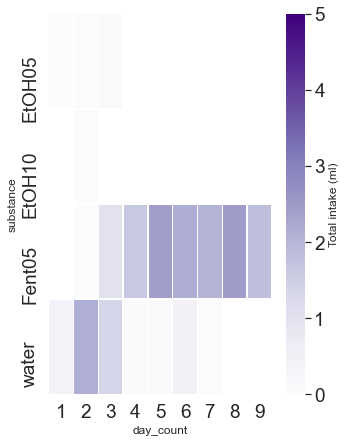

041AC168BD


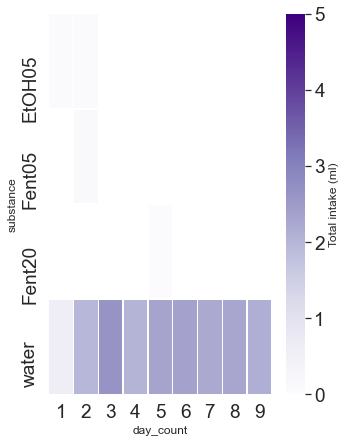

041ABFEA34


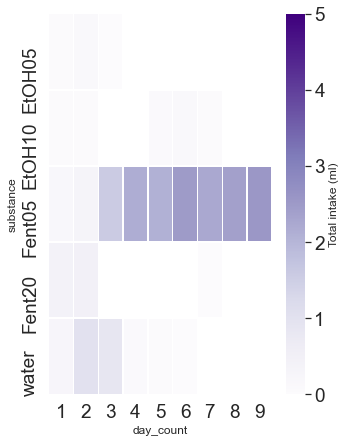

041ABFFA62


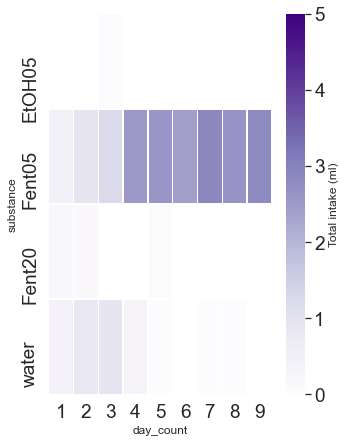

041AC16ADE


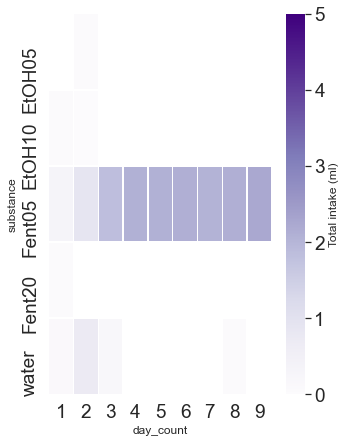

041AC162F0


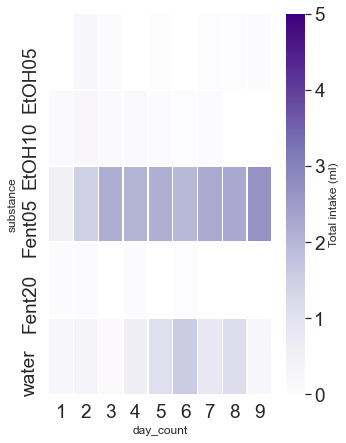

041AC16321


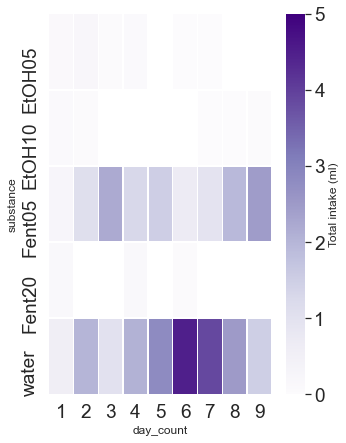

041AC166C2


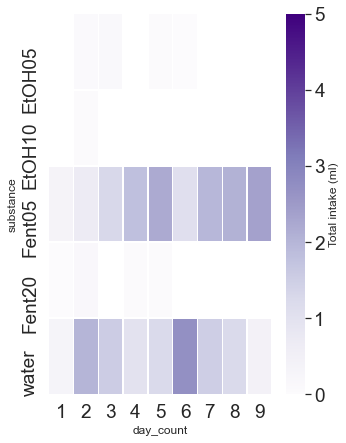

041AC1637F


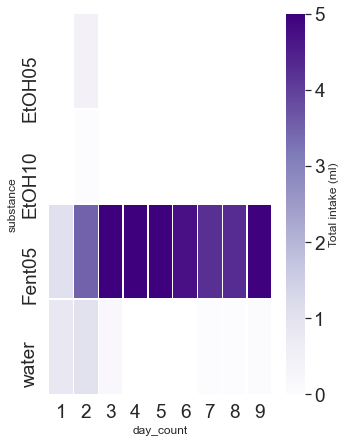

041AC165A6


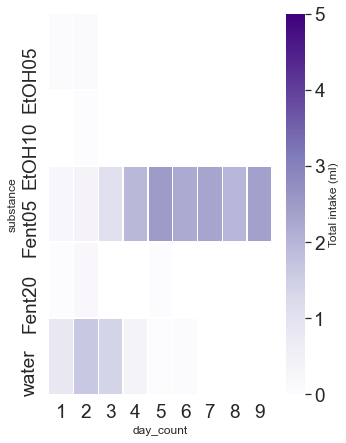

041AC165B6


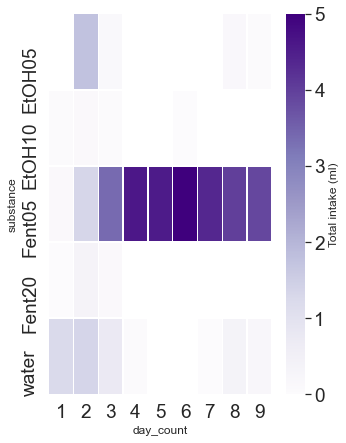

041ABFE86A


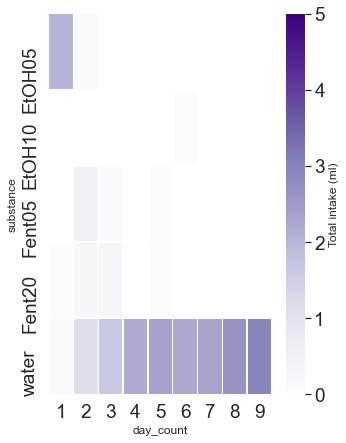

041AC15DE9


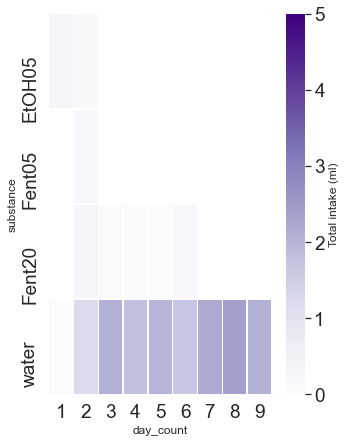

041AC16A73


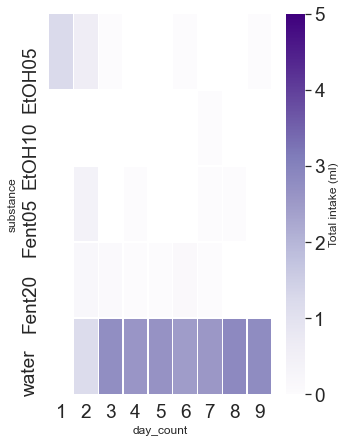

041AC16188


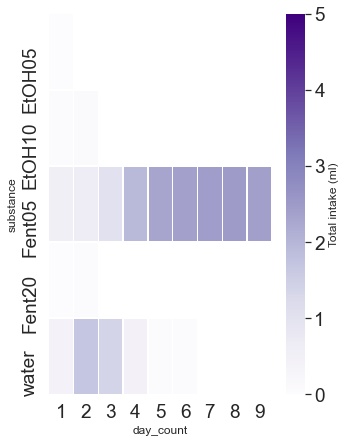

041AC166B1


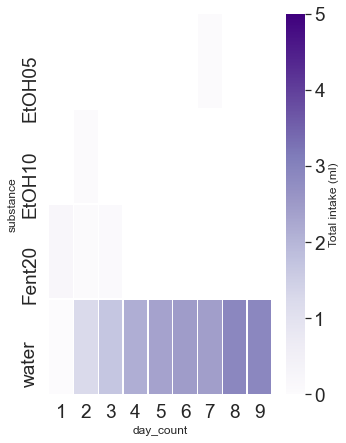

041AC15F27


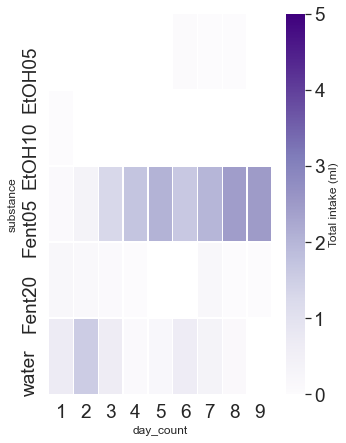

041AC15F30


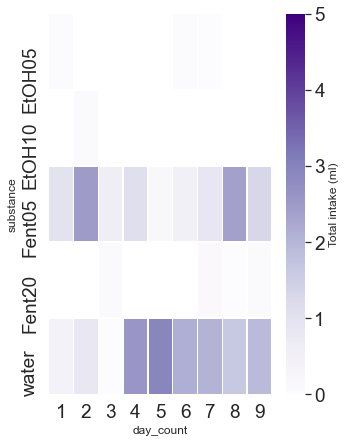

041AC01110


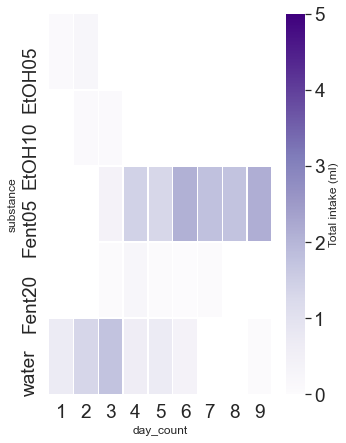

041AC02E82


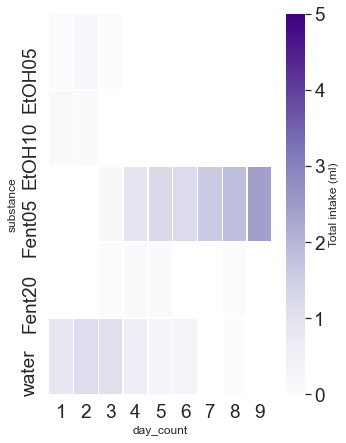

041AC16672


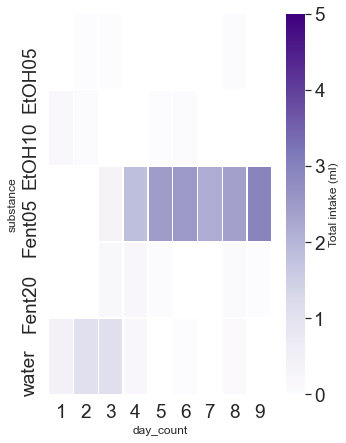

041AC15DF7


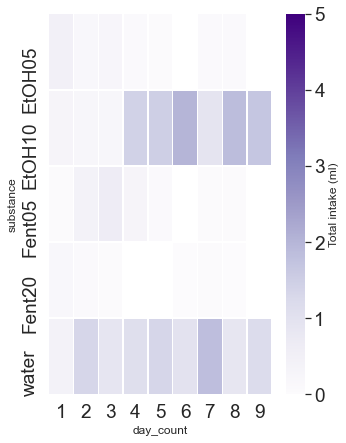

041AC1635B


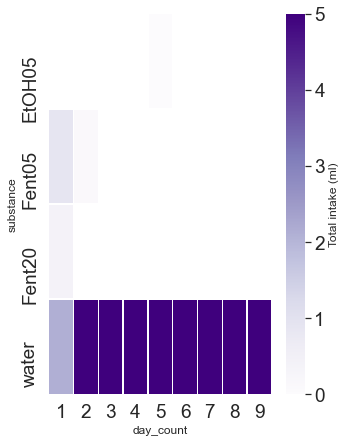

041AC164CB


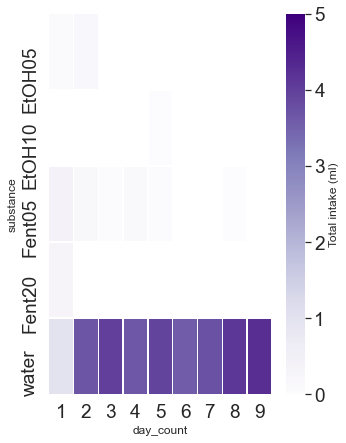

041AC160C0


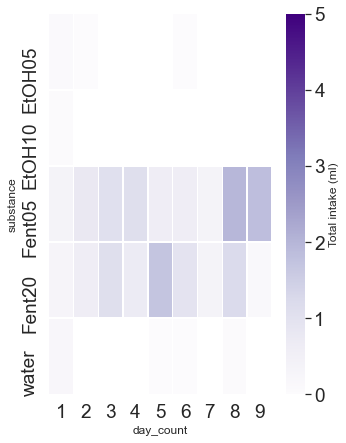

041AC169DC


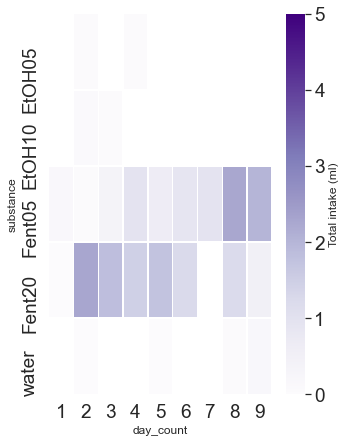

041AC16B67


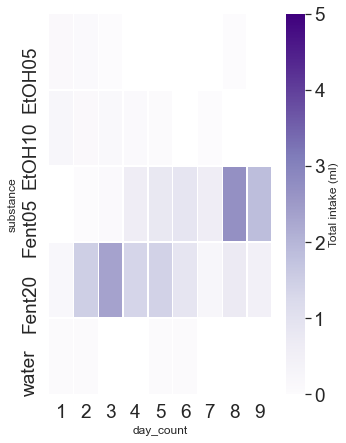

041AC15ED3


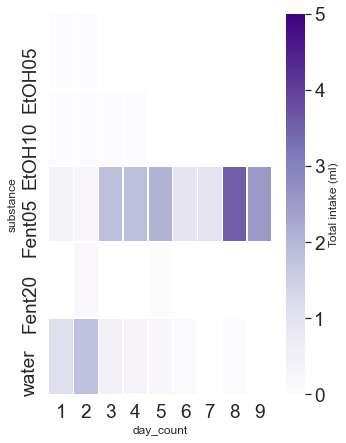

041AC1646E


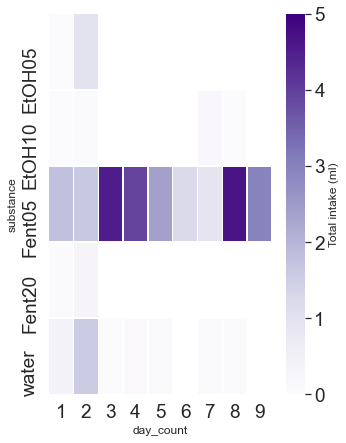

041AC165FE


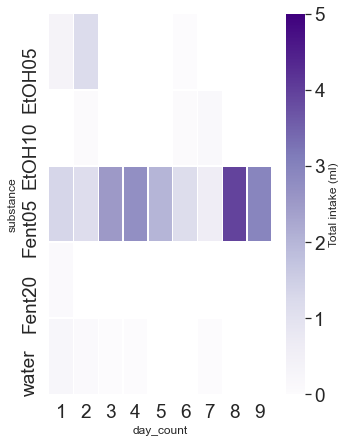

041AC1677D


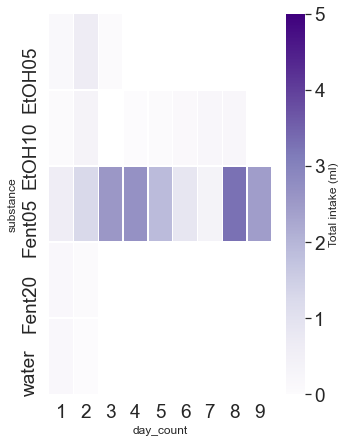

041AC1617F


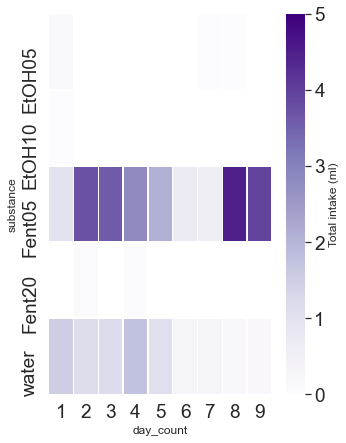

041AC1646F


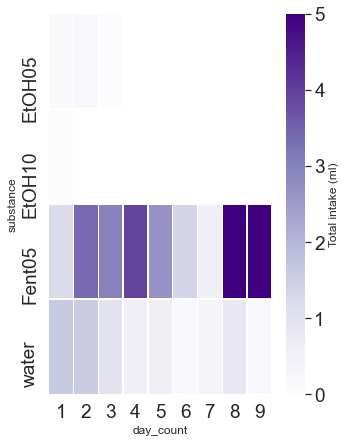

041AC16486


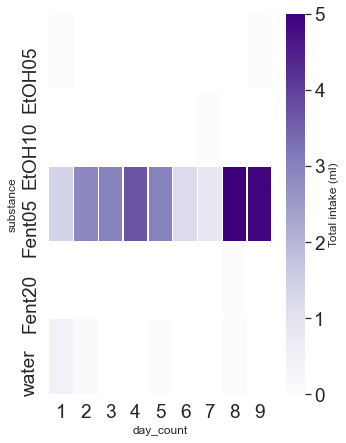

041AC16782


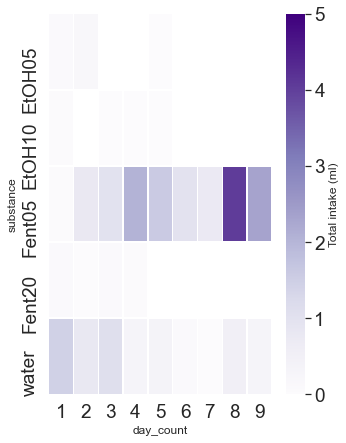

041AC16317


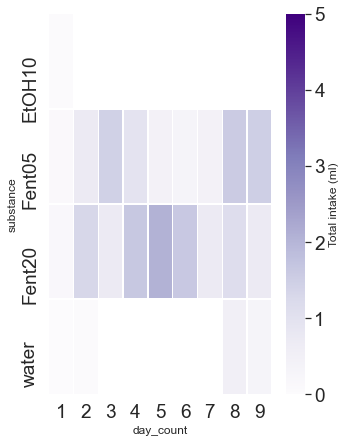

In [26]:
for sub in d['IdRFID'].unique():
    print(sub)
    d2 = d[d['IdRFID']==sub]
    groupby = d2.groupby(['substance', 'day_count'])['value'].sum().reset_index()
    groupby = groupby.pivot('substance', 'day_count', "value")
    plt.figure(figsize=(5,7))
    ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=5, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})
    #plt.xlabel('Bottle')
    plt.show()

In [ ]:
data_final_clean_3s[data_final_clean_3s['Round']=='flavor']['IdRFID'].value_counts()

In [ ]:
d=data_final_clean_3s[data_final_clean_3s['Round']=='flavor']
d=d[d['day_count']<8]
colorCodes = ['C{}'.format(i) for i in range(6)]



param = 'sec_count_running'

data_1 = d[d['IdRFID'] == '041ABFF18E'][param].values
data_2 = d[d['IdRFID'] == '041ABFF5CF'][param].values
data_3 = d[d['IdRFID'] == '041A555C38'][param].values
data_4 = d[d['IdRFID'] == '041AC03717'][param].values
data_5 = d[d['IdRFID'] == '041AC00A9F'][param].values
data_6 = d[d['IdRFID'] == '041ABFE8D4'][param].values

data_array = np.array([data_1, data_2, data_3, data_4, data_5,
                      data_6])

# Draw a spike raster plot
plt.figure(figsize=(90,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3,4,5], 
           ['1', '2', '3', '4', '5', '6'])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('IdRFID')


plt.show()

In [ ]:
d=data_final_clean_3s[data_final_clean_3s['Round']=='poly']
d_f5 = d[d['substance']=='Fent05']
d_e5 = d[d['substance']=='EtOH05']
d_w = d[d['substance']=='water']

colorCodes = ['C{}'.format(i) for i in range(6)]



param = 'sec_count_running'

data_1 = d_f5[d_f5['IdRFID'] == '041AC16447'][param].values
data_2 = d_e5[d_e5['IdRFID'] == '041AC16447'][param].values
data_3 = d_w[d_w['IdRFID'] == '041AC16447'][param].values
data_4 = d_f5[d_f5['IdRFID'] == '041AC1620E'][param].values
data_5 = d_e5[d_e5['IdRFID'] == '041AC1620E'][param].values
data_6 = d_w[d_w['IdRFID'] == '041AC1620E'][param].values

data_array = np.array([data_1, data_2, data_3, data_4, data_5,
                      data_6])

# Draw a spike raster plot
plt.figure(figsize=(90,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3,4,5], 
           ['F5', 'E5', 'W', 'F5', 'E5', 'W',])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('IdRFID')


plt.show()

### Summarize and combine with AM behavior

In [ ]:
data_clean.to_csv('poly_data_220805.csv')

In [ ]:
data_gbmean = data_clean.groupby(['VDM_file', 'Sex', 'Cage', 'Cage_N', 'IdRFID', 'day_count', 
                                   'substance', ])[['value', 'value_wt']].sum().reset_index()

data_gbmean.head()

In [ ]:
hue_order=['water', 'Fent05', 'Fent20', 'EtOH05', 'EtOH10']

sns.catplot(x='Sex', y='value_wt', data=data_gbmean[data_gbmean['day_count']<5],  kind='bar', 
            ci=68, height=5, aspect=1, hue='substance', hue_order=hue_order,
            col='Cage_N')


plt.ylabel('Daily Intake (ml)')

plt.show()

In [ ]:
path_behav = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/meta/RFID_VDM_behavior.xlsx'

data_behav = pd.read_excel(path_behav)
data_behav = pd.DataFrame(data = data_behav)

data_behav.head()

In [ ]:
sns.catplot(x='Sex', y='Entries', data=data_behav[data_behav['Behavior']=='EZM'],  kind='bar', 
            ci=68, height=5, aspect=1, hue='Session')

In [ ]:
sns.lmplot(x='Dominance', y='Latency', data=data_behav[data_behav['Behavior']=='OFB'], hue='Session')

In [ ]:
data_gbmean_beh = data_gbmean.merge(data_behav, on=['IdRFID'])

data_gbmean_beh.head()

In [ ]:
d=data_gbmean_beh[data_gbmean_beh['Behavior']=='EZM']
d=d[d['Session']==1]

sns.lmplot(x='Dominance', y='value', data=d[d['substance']!='water'], col='substance')